# Quartic multiple regression on different databases : effect of outlier on multiple regression

The best Multiple Regression with quartic interaction is trained with different databases on each output (elastic modulus E, hardness H, EBSD Confidence Index CI and Image Quality IQ) to assess the impact of data quality over the operformance of the model. 

For each output and each datasets:
 - import dataset as dataframe and compute Scheffé interaction terms for quartic multiple regression
 - iterative kfold crossvalidation on quartic multiple regression
 - return R² and MAE mean and standard deviation
 - plot MAE histogram and expected vs predicted regression on chosne number of fold and iterations

## Import libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import MultipleRegression_module as MR


## Path to datasets

In [11]:
datasets_dir=os.getenv("DATASETS_DIR_EG")

## Effect of outliers on quartic multiple regression

### Raw data database 

#### Import database "Raw_data_corrected" and add the intercation columns

In [12]:
data=pd.read_csv(f"{datasets_dir}/Raw_data_corrected.csv", header=0)
data.columns=['compo','sample','Zr', 'Nb','Mo','Ti','Cr','Zr_m','Nb_m','Mo_m','Ti_m','Cr_m','E', 'H','CI','IQ','Phase']
data=MR.Scheffe_interactions_terms(data)

#### For elastic modulus E 
Define X and y data and train the multiple regressions 

In [13]:
X=data[['Zr','Nb','Mo','Ti','Cr','Zr_Nb','Zr_Mo','Zr_Ti','Zr_Cr','Nb_Mo','Nb_Ti','Nb_Cr','Mo_Ti','Mo_Cr','Ti_Cr','Zr2','Nb2','Mo2','Ti2','Cr2','Zr_Nb2','Zr_Mo2','Zr_Ti2','Zr_Cr2','Nb_Mo2','Nb_Ti2','Nb_Cr2','Mo_Ti2','Mo_Cr2','Ti_Cr2']]
y= data['E']

model,MAE_list,R2_list,Y_pred,Y_test= MR.fit_outputs('E ~ Zr + Nb + Mo + Ti + Cr + Zr:Nb +Zr:Mo +Zr:Ti +Zr:Cr +Nb:Mo +Nb:Ti +Nb:Cr +Mo:Ti + Mo:Cr + Ti:Cr + Zr:Nb:Zr_Nb +Zr:Mo:Zr_Mo + Zr:Ti:Zr_Ti+ Zr:Cr:Zr_Cr + Nb:Mo:Nb_Mo +Nb:Ti:Nb_Ti +Nb:Cr:Nb_Cr +Mo:Ti:Mo_Ti + Mo:Cr:Mo_Cr + Ti:Cr:Ti_Cr + Zr:Nb:Mo:Ti + Zr:Nb:Mo:Cr + Zr:Nb:Ti:Cr + Zr:Mo:Ti:Cr + Nb:Mo:Ti:Cr + Zr2:Nb:Mo +Zr2:Nb:Ti +Zr2:Nb:Cr +Zr2:Mo:Ti +Zr2:Mo:Cr +Zr2:Ti:Cr + Zr:Nb2:Mo + Zr:Nb2:Ti +Zr:Nb2:Cr + Zr:Nb:Mo2 + Zr:Nb:Ti2 +Zr:Nb:Cr2 + Zr:Mo2:Ti + Zr:Mo2:Cr + Zr:Mo:Ti2 + Zr:Mo:Cr2 + Zr:Ti2:Cr + Zr:Ti:Cr2 + Nb2:Mo:Ti + Nb2:Mo:Cr + Nb2:Ti:Cr + Nb:Mo2:Ti + Nb:Mo2:Cr +  Nb:Mo:Ti2 + Nb:Mo:Cr2 + Nb:Ti2:Cr + Nb:Ti:Cr2 + Mo2:Ti:Cr +Mo:Ti2:Cr + Mo:Ti:Cr2 + Zr:Nb:Zr_Nb2 +Zr:Mo:Zr_Mo2 + Zr:Ti:Zr_Ti2+ Zr:Cr:Zr_Cr2 + Nb:Mo:Nb_Mo2 +Nb:Ti:Nb_Ti2 +Nb:Cr:Nb_Cr2 +Mo:Ti:Mo_Ti2 + Mo:Cr:Mo_Cr2 + Ti:Cr:Ti_Cr2 -1',5,30,'E',X,y)
print('R2=',np.mean(R2_list),'+/-',np.std(R2_list))
print('MAE=',np.mean(MAE_list),'+/-',np.std(MAE_list))

R2= 0.8115665964831169 +/- 0.04541489308071214
MAE= 13.967668923459305 +/- 1.0699862282665553


Plot regression between test and predicted outputs, and metric histogram

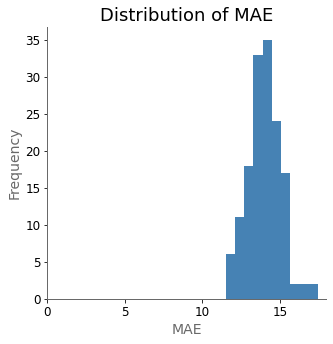

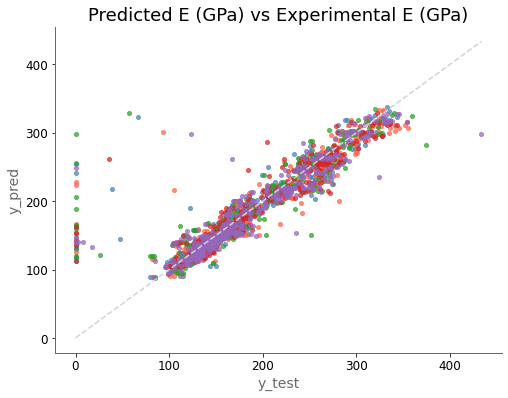

In [14]:
MR.plot_result( 'MAE', 'E (GPa)' , MAE_list, Y_pred, Y_test, 0,18, 1,5, './run/MR/Raw_data_E_MAE.png', './run/MR/Raw_data_E.png')

#### For hardness H 
Define X and y data and train the multiple regressions 

In [15]:
X=data[['Zr','Nb','Mo','Ti','Cr','Zr_Nb','Zr_Mo','Zr_Ti','Zr_Cr','Nb_Mo','Nb_Ti','Nb_Cr','Mo_Ti','Mo_Cr','Ti_Cr','Zr2','Nb2','Mo2','Ti2','Cr2','Zr_Nb2','Zr_Mo2','Zr_Ti2','Zr_Cr2','Nb_Mo2','Nb_Ti2','Nb_Cr2','Mo_Ti2','Mo_Cr2','Ti_Cr2']]
y= data['H']

model,MAE_list,R2_list,Y_pred,Y_test= MR.fit_outputs('H ~ Zr + Nb + Mo + Ti + Cr + Zr:Nb +Zr:Mo +Zr:Ti +Zr:Cr +Nb:Mo +Nb:Ti +Nb:Cr +Mo:Ti + Mo:Cr + Ti:Cr + Zr:Nb:Zr_Nb +Zr:Mo:Zr_Mo + Zr:Ti:Zr_Ti+ Zr:Cr:Zr_Cr + Nb:Mo:Nb_Mo +Nb:Ti:Nb_Ti +Nb:Cr:Nb_Cr +Mo:Ti:Mo_Ti + Mo:Cr:Mo_Cr + Ti:Cr:Ti_Cr + Zr:Nb:Mo:Ti + Zr:Nb:Mo:Cr + Zr:Nb:Ti:Cr + Zr:Mo:Ti:Cr + Nb:Mo:Ti:Cr + Zr2:Nb:Mo +Zr2:Nb:Ti +Zr2:Nb:Cr +Zr2:Mo:Ti +Zr2:Mo:Cr +Zr2:Ti:Cr + Zr:Nb2:Mo + Zr:Nb2:Ti +Zr:Nb2:Cr + Zr:Nb:Mo2 + Zr:Nb:Ti2 +Zr:Nb:Cr2 + Zr:Mo2:Ti + Zr:Mo2:Cr + Zr:Mo:Ti2 + Zr:Mo:Cr2 + Zr:Ti2:Cr + Zr:Ti:Cr2 + Nb2:Mo:Ti + Nb2:Mo:Cr + Nb2:Ti:Cr + Nb:Mo2:Ti + Nb:Mo2:Cr +  Nb:Mo:Ti2 + Nb:Mo:Cr2 + Nb:Ti2:Cr + Nb:Ti:Cr2 + Mo2:Ti:Cr +Mo:Ti2:Cr + Mo:Ti:Cr2 + Zr:Nb:Zr_Nb2 +Zr:Mo:Zr_Mo2 + Zr:Ti:Zr_Ti2+ Zr:Cr:Zr_Cr2 + Nb:Mo:Nb_Mo2 +Nb:Ti:Nb_Ti2 +Nb:Cr:Nb_Cr2 +Mo:Ti:Mo_Ti2 + Mo:Cr:Mo_Cr2 + Ti:Cr:Ti_Cr2 -1',5,30,'H',X,y)

print('R2=',np.mean(R2_list),'+/-',np.std(R2_list))
print('MAE=',np.mean(MAE_list),'+/-',np.std(MAE_list))

R2= 0.7100334919432725 +/- 0.04482160401940382
MAE= 0.9098854671179565 +/- 0.059260972062239556


Plot regression between test and predicted outputs, and metric histogram

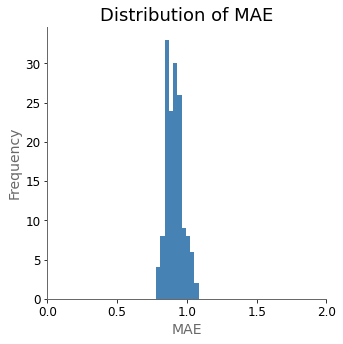

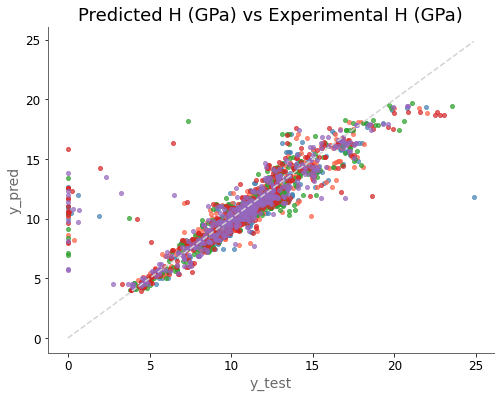

In [16]:
MR.plot_result( 'MAE', 'H (GPa)' , MAE_list, Y_pred, Y_test,0,2, 1,5, './run/MR/Raw_data_H_MAE.png', './run/MR/Raw_data_H.png')

### Threshold data database

#### Import database "Compo_E_H_threshold" and add the intercation columns

In [17]:
data=pd.read_csv(f"{datasets_dir}/Compo_E_H_threshold.csv", header=0)
data.columns=['compo','sample','Zr', 'Nb','Mo','Ti','Cr','Zr_m','Nb_m','Mo_m','Ti_m','Cr_m','E', 'H','CI','IQ','Phase']
data=MR.Scheffe_interactions_terms(data)

#### For elastic modulus E
Define X and y data and train the multiple regressions 

In [18]:
X=data[['Zr','Nb','Mo','Ti','Cr','Zr_Nb','Zr_Mo','Zr_Ti','Zr_Cr','Nb_Mo','Nb_Ti','Nb_Cr','Mo_Ti','Mo_Cr','Ti_Cr','Zr2','Nb2','Mo2','Ti2','Cr2','Zr_Nb2','Zr_Mo2','Zr_Ti2','Zr_Cr2','Nb_Mo2','Nb_Ti2','Nb_Cr2','Mo_Ti2','Mo_Cr2','Ti_Cr2']]
y= data['E']

model,MAE_list,R2_list,Y_pred,Y_test= MR.fit_outputs('E ~ Zr + Nb + Mo + Ti + Cr + Zr:Nb +Zr:Mo +Zr:Ti +Zr:Cr +Nb:Mo +Nb:Ti +Nb:Cr +Mo:Ti + Mo:Cr + Ti:Cr + Zr:Nb:Zr_Nb +Zr:Mo:Zr_Mo + Zr:Ti:Zr_Ti+ Zr:Cr:Zr_Cr + Nb:Mo:Nb_Mo +Nb:Ti:Nb_Ti +Nb:Cr:Nb_Cr +Mo:Ti:Mo_Ti + Mo:Cr:Mo_Cr + Ti:Cr:Ti_Cr + Zr:Nb:Mo:Ti + Zr:Nb:Mo:Cr + Zr:Nb:Ti:Cr + Zr:Mo:Ti:Cr + Nb:Mo:Ti:Cr + Zr2:Nb:Mo +Zr2:Nb:Ti +Zr2:Nb:Cr +Zr2:Mo:Ti +Zr2:Mo:Cr +Zr2:Ti:Cr + Zr:Nb2:Mo + Zr:Nb2:Ti +Zr:Nb2:Cr + Zr:Nb:Mo2 + Zr:Nb:Ti2 +Zr:Nb:Cr2 + Zr:Mo2:Ti + Zr:Mo2:Cr + Zr:Mo:Ti2 + Zr:Mo:Cr2 + Zr:Ti2:Cr + Zr:Ti:Cr2 + Nb2:Mo:Ti + Nb2:Mo:Cr + Nb2:Ti:Cr + Nb:Mo2:Ti + Nb:Mo2:Cr +  Nb:Mo:Ti2 + Nb:Mo:Cr2 + Nb:Ti2:Cr + Nb:Ti:Cr2 + Mo2:Ti:Cr +Mo:Ti2:Cr + Mo:Ti:Cr2 + Zr:Nb:Zr_Nb2 +Zr:Mo:Zr_Mo2 + Zr:Ti:Zr_Ti2+ Zr:Cr:Zr_Cr2 + Nb:Mo:Nb_Mo2 +Nb:Ti:Nb_Ti2 +Nb:Cr:Nb_Cr2 +Mo:Ti:Mo_Ti2 + Mo:Cr:Mo_Cr2 + Ti:Cr:Ti_Cr2 -1',5,30,'E',X,y)

print('R2=',np.mean(R2_list),'+/-',np.std(R2_list))
print('MAE=',np.mean(MAE_list),'+/-',np.std(MAE_list))

R2= 0.9104965557637023 +/- 0.03032912985041183
MAE= 10.486654125261643 +/- 0.6242161246607404


Plot regression between test and predicted outputs, and metric histogram

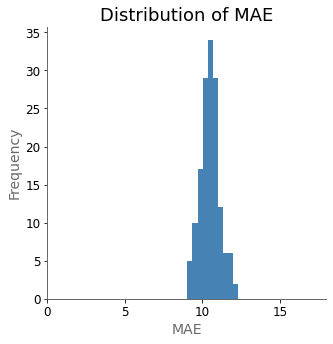

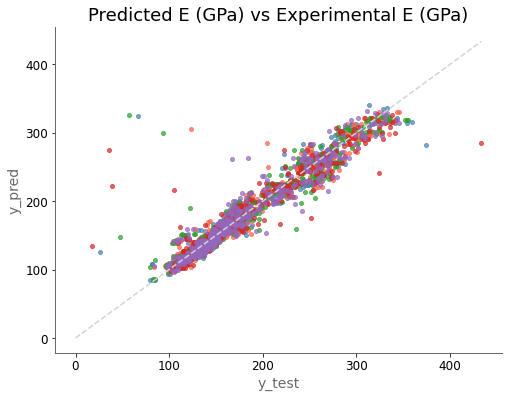

In [19]:
MR.plot_result( 'MAE', 'E (GPa)' , MAE_list, Y_pred, Y_test,0,18, 1,5, './run/MR/Threshold_E_MAE.png', './run/MR/Threshold_E.png')

#### For hardness H
Define X and y data and train the multiple regressions 

In [20]:
X=data[['Zr','Nb','Mo','Ti','Cr','Zr_Nb','Zr_Mo','Zr_Ti','Zr_Cr','Nb_Mo','Nb_Ti','Nb_Cr','Mo_Ti','Mo_Cr','Ti_Cr','Zr2','Nb2','Mo2','Ti2','Cr2','Zr_Nb2','Zr_Mo2','Zr_Ti2','Zr_Cr2','Nb_Mo2','Nb_Ti2','Nb_Cr2','Mo_Ti2','Mo_Cr2','Ti_Cr2']]
y= data['H']

model,MAE_list,R2_list,Y_pred,Y_test= MR.fit_outputs('H ~ Zr + Nb + Mo + Ti + Cr + Zr:Nb +Zr:Mo +Zr:Ti +Zr:Cr +Nb:Mo +Nb:Ti +Nb:Cr +Mo:Ti + Mo:Cr + Ti:Cr + Zr:Nb:Zr_Nb +Zr:Mo:Zr_Mo + Zr:Ti:Zr_Ti+ Zr:Cr:Zr_Cr + Nb:Mo:Nb_Mo +Nb:Ti:Nb_Ti +Nb:Cr:Nb_Cr +Mo:Ti:Mo_Ti + Mo:Cr:Mo_Cr + Ti:Cr:Ti_Cr + Zr:Nb:Mo:Ti + Zr:Nb:Mo:Cr + Zr:Nb:Ti:Cr + Zr:Mo:Ti:Cr + Nb:Mo:Ti:Cr + Zr2:Nb:Mo +Zr2:Nb:Ti +Zr2:Nb:Cr +Zr2:Mo:Ti +Zr2:Mo:Cr +Zr2:Ti:Cr + Zr:Nb2:Mo + Zr:Nb2:Ti +Zr:Nb2:Cr + Zr:Nb:Mo2 + Zr:Nb:Ti2 +Zr:Nb:Cr2 + Zr:Mo2:Ti + Zr:Mo2:Cr + Zr:Mo:Ti2 + Zr:Mo:Cr2 + Zr:Ti2:Cr + Zr:Ti:Cr2 + Nb2:Mo:Ti + Nb2:Mo:Cr + Nb2:Ti:Cr + Nb:Mo2:Ti + Nb:Mo2:Cr +  Nb:Mo:Ti2 + Nb:Mo:Cr2 + Nb:Ti2:Cr + Nb:Ti:Cr2 + Mo2:Ti:Cr +Mo:Ti2:Cr + Mo:Ti:Cr2 + Zr:Nb:Zr_Nb2 +Zr:Mo:Zr_Mo2 + Zr:Ti:Zr_Ti2+ Zr:Cr:Zr_Cr2 + Nb:Mo:Nb_Mo2 +Nb:Ti:Nb_Ti2 +Nb:Cr:Nb_Cr2 +Mo:Ti:Mo_Ti2 + Mo:Cr:Mo_Cr2 + Ti:Cr:Ti_Cr2 -1',5,30,'H',X,y)

print('R2=',np.mean(R2_list),'+/-',np.std(R2_list))
print('MAE=',np.mean(MAE_list),'+/-',np.std(MAE_list))

R2= 0.847517223107485 +/- 0.03704157551587936
MAE= 0.6988558209034264 +/- 0.041793847718871


Plot regression between test and predicted outputs, and metric histogram

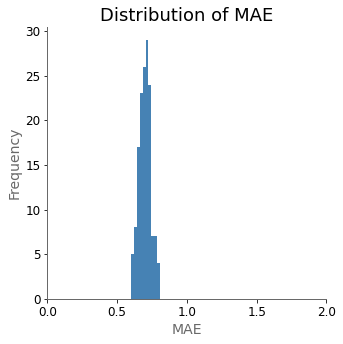

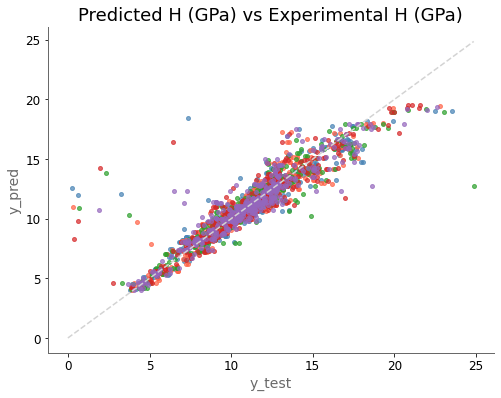

In [21]:
MR.plot_result( 'MAE', 'H (GPa)' , MAE_list, Y_pred, Y_test,0,2, 1,5, './run/MR/Threshold_H_MAE.png', './run/MR/Threshold_H.png')


### Statistically processed data database

#### For elastic modulus E
#### Import database "Compo_E_wo_outlier" for elastic modulus and add the intercation columns

In [22]:
data=pd.read_csv(f"{datasets_dir}/Compo_E_wo_outlier.csv", header=0)
data.columns=['compo','sample','Zr', 'Nb','Mo','Ti','Cr','Zr_m','Nb_m','Mo_m','Ti_m','Cr_m','E']
data=MR.Scheffe_interactions_terms(data)

Define X and y data and train the multiple regressions 

In [23]:
X=data[['Zr','Nb','Mo','Ti','Cr','Zr_Nb','Zr_Mo','Zr_Ti','Zr_Cr','Nb_Mo','Nb_Ti','Nb_Cr','Mo_Ti','Mo_Cr','Ti_Cr','Zr2','Nb2','Mo2','Ti2','Cr2','Zr_Nb2','Zr_Mo2','Zr_Ti2','Zr_Cr2','Nb_Mo2','Nb_Ti2','Nb_Cr2','Mo_Ti2','Mo_Cr2','Ti_Cr2']]
y= data['E']

model,MAE_list,R2_list,Y_pred,Y_test= MR.fit_outputs('E ~ Zr + Nb + Mo + Ti + Cr + Zr:Nb +Zr:Mo +Zr:Ti +Zr:Cr +Nb:Mo +Nb:Ti +Nb:Cr +Mo:Ti + Mo:Cr + Ti:Cr + Zr:Nb:Zr_Nb +Zr:Mo:Zr_Mo + Zr:Ti:Zr_Ti+ Zr:Cr:Zr_Cr + Nb:Mo:Nb_Mo +Nb:Ti:Nb_Ti +Nb:Cr:Nb_Cr +Mo:Ti:Mo_Ti + Mo:Cr:Mo_Cr + Ti:Cr:Ti_Cr + Zr:Nb:Mo:Ti + Zr:Nb:Mo:Cr + Zr:Nb:Ti:Cr + Zr:Mo:Ti:Cr + Nb:Mo:Ti:Cr + Zr2:Nb:Mo +Zr2:Nb:Ti +Zr2:Nb:Cr +Zr2:Mo:Ti +Zr2:Mo:Cr +Zr2:Ti:Cr + Zr:Nb2:Mo + Zr:Nb2:Ti +Zr:Nb2:Cr + Zr:Nb:Mo2 + Zr:Nb:Ti2 +Zr:Nb:Cr2 + Zr:Mo2:Ti + Zr:Mo2:Cr + Zr:Mo:Ti2 + Zr:Mo:Cr2 + Zr:Ti2:Cr + Zr:Ti:Cr2 + Nb2:Mo:Ti + Nb2:Mo:Cr + Nb2:Ti:Cr + Nb:Mo2:Ti + Nb:Mo2:Cr +  Nb:Mo:Ti2 + Nb:Mo:Cr2 + Nb:Ti2:Cr + Nb:Ti:Cr2 + Mo2:Ti:Cr +Mo:Ti2:Cr + Mo:Ti:Cr2 + Zr:Nb:Zr_Nb2 +Zr:Mo:Zr_Mo2 + Zr:Ti:Zr_Ti2+ Zr:Cr:Zr_Cr2 + Nb:Mo:Nb_Mo2 +Nb:Ti:Nb_Ti2 +Nb:Cr:Nb_Cr2 +Mo:Ti:Mo_Ti2 + Mo:Cr:Mo_Cr2 + Ti:Cr:Ti_Cr2 -1',5,30,'E',X,y)

print('R2=',np.mean(R2_list),'+/-',np.std(R2_list))
print('MAE=',np.mean(MAE_list),'+/-',np.std(MAE_list))

R2= 0.9506652291495082 +/- 0.00961902692834848
MAE= 9.3523052086888 +/- 0.46671843763648735


Plot regression between test and predicted outputs, and metric histogram

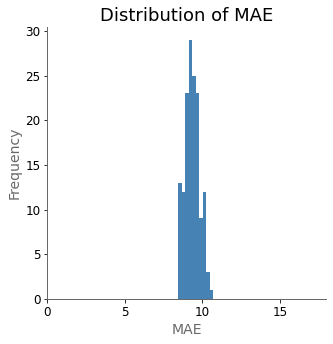

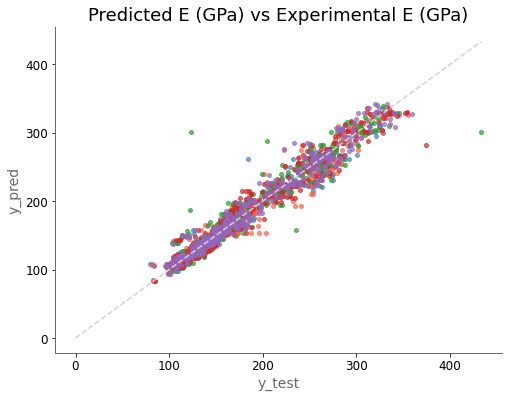

In [24]:
MR.plot_result( 'MAE', 'E (GPa)' , MAE_list, Y_pred, Y_test, 0,18,1,5, './run/MR/No_outliers_E_MAE.png', './run/MR/No_outliers_E.png')


#### For hardness H
#### Import database "Compo_H_wo_outlier" for hardness and add the intercation columns

In [25]:
data=pd.read_csv(f"{datasets_dir}/Compo_H_wo_outlier.csv", header=0)
data.columns=['compo','sample','Zr', 'Nb','Mo','Ti','Cr','Zr_m','Nb_m','Mo_m','Ti_m','Cr_m','H']
data=MR.Scheffe_interactions_terms(data)

Define X and y data and train the multiple regressions 

In [26]:
X=data[['Zr','Nb','Mo','Ti','Cr','Zr_Nb','Zr_Mo','Zr_Ti','Zr_Cr','Nb_Mo','Nb_Ti','Nb_Cr','Mo_Ti','Mo_Cr','Ti_Cr','Zr2','Nb2','Mo2','Ti2','Cr2','Zr_Nb2','Zr_Mo2','Zr_Ti2','Zr_Cr2','Nb_Mo2','Nb_Ti2','Nb_Cr2','Mo_Ti2','Mo_Cr2','Ti_Cr2']]
y= data['H']

model,MAE_list,R2_list,Y_pred,Y_test= MR.fit_outputs('H ~ Zr + Nb + Mo + Ti + Cr + Zr:Nb +Zr:Mo +Zr:Ti +Zr:Cr +Nb:Mo +Nb:Ti +Nb:Cr +Mo:Ti + Mo:Cr + Ti:Cr + Zr:Nb:Zr_Nb +Zr:Mo:Zr_Mo + Zr:Ti:Zr_Ti+ Zr:Cr:Zr_Cr + Nb:Mo:Nb_Mo +Nb:Ti:Nb_Ti +Nb:Cr:Nb_Cr +Mo:Ti:Mo_Ti + Mo:Cr:Mo_Cr + Ti:Cr:Ti_Cr + Zr:Nb:Mo:Ti + Zr:Nb:Mo:Cr + Zr:Nb:Ti:Cr + Zr:Mo:Ti:Cr + Nb:Mo:Ti:Cr + Zr2:Nb:Mo +Zr2:Nb:Ti +Zr2:Nb:Cr +Zr2:Mo:Ti +Zr2:Mo:Cr +Zr2:Ti:Cr + Zr:Nb2:Mo + Zr:Nb2:Ti +Zr:Nb2:Cr + Zr:Nb:Mo2 + Zr:Nb:Ti2 +Zr:Nb:Cr2 + Zr:Mo2:Ti + Zr:Mo2:Cr + Zr:Mo:Ti2 + Zr:Mo:Cr2 + Zr:Ti2:Cr + Zr:Ti:Cr2 + Nb2:Mo:Ti + Nb2:Mo:Cr + Nb2:Ti:Cr + Nb:Mo2:Ti + Nb:Mo2:Cr +  Nb:Mo:Ti2 + Nb:Mo:Cr2 + Nb:Ti2:Cr + Nb:Ti:Cr2 + Mo2:Ti:Cr +Mo:Ti2:Cr + Mo:Ti:Cr2 + Zr:Nb:Zr_Nb2 +Zr:Mo:Zr_Mo2 + Zr:Ti:Zr_Ti2+ Zr:Cr:Zr_Cr2 + Nb:Mo:Nb_Mo2 +Nb:Ti:Nb_Ti2 +Nb:Cr:Nb_Cr2 +Mo:Ti:Mo_Ti2 + Mo:Cr:Mo_Cr2 + Ti:Cr:Ti_Cr2 -1',5,30,'H',X,y)

print('R2=',np.mean(R2_list),'+/-',np.std(R2_list))
print('MAE=',np.mean(MAE_list),'+/-',np.std(MAE_list))

R2= 0.916122595636295 +/- 0.012518292756583154
MAE= 0.6055652774583147 +/- 0.024392918380710615


Plot regression between test and predicted outputs, and metric histogram

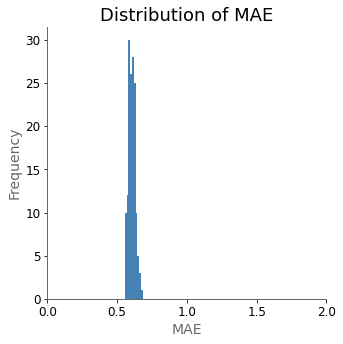

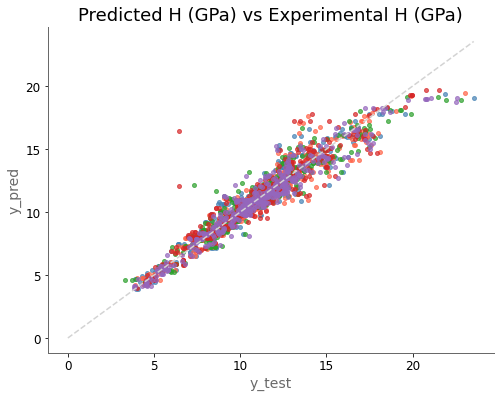

In [27]:
MR.plot_result( 'MAE', 'H (GPa)' , MAE_list, Y_pred, Y_test,0,2, 1,5, './run/MR/No_outliers_H_MAE.png', './run/MR/No_outliers_H.png')


### Data averaged database 

#### Import database "Data_averaged" and add the intercation columns

In [28]:
data=pd.read_csv(f"{datasets_dir}/Data_averaged.csv", header=0)
data.columns=['compo','sample','Zr', 'Nb','Mo','Ti','Cr','Zr_m','Nb_m','Mo_m','Ti_m','Cr_m','E', 'H','stdE','stdH','CI','IQ','Phase']
data=MR.Scheffe_interactions_terms(data)

#### For elastic modulus E
Define X and y data and train the multiple regressions 

In [29]:
X=data[['Zr','Nb','Mo','Ti','Cr','Zr_Nb','Zr_Mo','Zr_Ti','Zr_Cr','Nb_Mo','Nb_Ti','Nb_Cr','Mo_Ti','Mo_Cr','Ti_Cr','Zr2','Nb2','Mo2','Ti2','Cr2','Zr_Nb2','Zr_Mo2','Zr_Ti2','Zr_Cr2','Nb_Mo2','Nb_Ti2','Nb_Cr2','Mo_Ti2','Mo_Cr2','Ti_Cr2']]
y= data['E']

model,MAE_list,R2_list,Y_pred,Y_test= MR.fit_outputs('E ~ Zr + Nb + Mo + Ti + Cr + Zr:Nb +Zr:Mo +Zr:Ti +Zr:Cr +Nb:Mo +Nb:Ti +Nb:Cr +Mo:Ti + Mo:Cr + Ti:Cr + Zr:Nb:Zr_Nb +Zr:Mo:Zr_Mo + Zr:Ti:Zr_Ti+ Zr:Cr:Zr_Cr + Nb:Mo:Nb_Mo +Nb:Ti:Nb_Ti +Nb:Cr:Nb_Cr +Mo:Ti:Mo_Ti + Mo:Cr:Mo_Cr + Ti:Cr:Ti_Cr + Zr:Nb:Mo:Ti + Zr:Nb:Mo:Cr + Zr:Nb:Ti:Cr + Zr:Mo:Ti:Cr + Nb:Mo:Ti:Cr + Zr2:Nb:Mo +Zr2:Nb:Ti +Zr2:Nb:Cr +Zr2:Mo:Ti +Zr2:Mo:Cr +Zr2:Ti:Cr + Zr:Nb2:Mo + Zr:Nb2:Ti +Zr:Nb2:Cr + Zr:Nb:Mo2 + Zr:Nb:Ti2 +Zr:Nb:Cr2 + Zr:Mo2:Ti + Zr:Mo2:Cr + Zr:Mo:Ti2 + Zr:Mo:Cr2 + Zr:Ti2:Cr + Zr:Ti:Cr2 + Nb2:Mo:Ti + Nb2:Mo:Cr + Nb2:Ti:Cr + Nb:Mo2:Ti + Nb:Mo2:Cr +  Nb:Mo:Ti2 + Nb:Mo:Cr2 + Nb:Ti2:Cr + Nb:Ti:Cr2 + Mo2:Ti:Cr +Mo:Ti2:Cr + Mo:Ti:Cr2 + Zr:Nb:Zr_Nb2 +Zr:Mo:Zr_Mo2 + Zr:Ti:Zr_Ti2+ Zr:Cr:Zr_Cr2 + Nb:Mo:Nb_Mo2 +Nb:Ti:Nb_Ti2 +Nb:Cr:Nb_Cr2 +Mo:Ti:Mo_Ti2 + Mo:Cr:Mo_Cr2 + Ti:Cr:Ti_Cr2 -1',5,30,'E',X,y)

print('R2=',np.mean(R2_list),'+/-',np.std(R2_list))
print('MAE=',np.mean(MAE_list),'+/-',np.std(MAE_list))

R2= 0.9548459592702041 +/- 0.011192539898109324
MAE= 9.147711626595635 +/- 0.8052895633209334


Plot regression between test and predicted outputs, and metric histogram

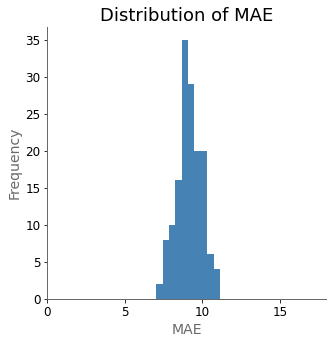

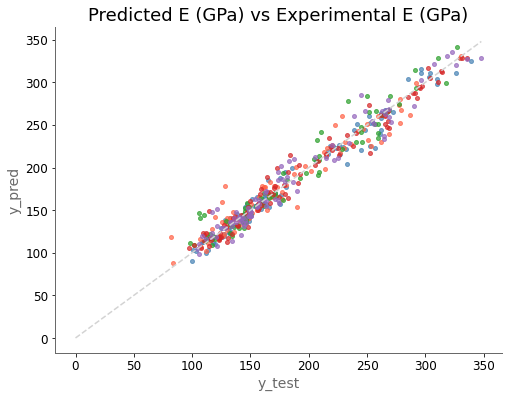

In [30]:
MR.plot_result( 'MAE', 'E (GPa)' , MAE_list, Y_pred, Y_test, 0,18, 1,5, './run/MR/Averaged_E_MAE.png', './run/MR/Averaged_E.png')

### For hardness H
Define X and y data and train the multiple regressions 

In [31]:
X=data[['Zr','Nb','Mo','Ti','Cr','Zr_Nb','Zr_Mo','Zr_Ti','Zr_Cr','Nb_Mo','Nb_Ti','Nb_Cr','Mo_Ti','Mo_Cr','Ti_Cr','Zr2','Nb2','Mo2','Ti2','Cr2','Zr_Nb2','Zr_Mo2','Zr_Ti2','Zr_Cr2','Nb_Mo2','Nb_Ti2','Nb_Cr2','Mo_Ti2','Mo_Cr2','Ti_Cr2']]
y= data['H']
model,MAE_list,R2_list,Y_pred,Y_test= MR.fit_outputs('H ~ Zr + Nb + Mo + Ti + Cr + Zr:Nb +Zr:Mo +Zr:Ti +Zr:Cr +Nb:Mo +Nb:Ti +Nb:Cr +Mo:Ti + Mo:Cr + Ti:Cr + Zr:Nb:Zr_Nb +Zr:Mo:Zr_Mo + Zr:Ti:Zr_Ti+ Zr:Cr:Zr_Cr + Nb:Mo:Nb_Mo +Nb:Ti:Nb_Ti +Nb:Cr:Nb_Cr +Mo:Ti:Mo_Ti + Mo:Cr:Mo_Cr + Ti:Cr:Ti_Cr + Zr:Nb:Mo:Ti + Zr:Nb:Mo:Cr + Zr:Nb:Ti:Cr + Zr:Mo:Ti:Cr + Nb:Mo:Ti:Cr + Zr2:Nb:Mo +Zr2:Nb:Ti +Zr2:Nb:Cr +Zr2:Mo:Ti +Zr2:Mo:Cr +Zr2:Ti:Cr + Zr:Nb2:Mo + Zr:Nb2:Ti +Zr:Nb2:Cr + Zr:Nb:Mo2 + Zr:Nb:Ti2 +Zr:Nb:Cr2 + Zr:Mo2:Ti + Zr:Mo2:Cr + Zr:Mo:Ti2 + Zr:Mo:Cr2 + Zr:Ti2:Cr + Zr:Ti:Cr2 + Nb2:Mo:Ti + Nb2:Mo:Cr + Nb2:Ti:Cr + Nb:Mo2:Ti + Nb:Mo2:Cr +  Nb:Mo:Ti2 + Nb:Mo:Cr2 + Nb:Ti2:Cr + Nb:Ti:Cr2 + Mo2:Ti:Cr +Mo:Ti2:Cr + Mo:Ti:Cr2 + Zr:Nb:Zr_Nb2 +Zr:Mo:Zr_Mo2 + Zr:Ti:Zr_Ti2+ Zr:Cr:Zr_Cr2 + Nb:Mo:Nb_Mo2 +Nb:Ti:Nb_Ti2 +Nb:Cr:Nb_Cr2 +Mo:Ti:Mo_Ti2 + Mo:Cr:Mo_Cr2 + Ti:Cr:Ti_Cr2 -1',5,30,'H',X,y)

print('R2=',np.mean(R2_list),'+/-',np.std(R2_list))
print('MAE=',np.mean(MAE_list),'+/-',np.std(MAE_list))

R2= 0.90630122357218 +/- 0.029806268632905444
MAE= 0.615951289143441 +/- 0.06266462808027508


Plot regression between test and predicted outputs, and metric histogram

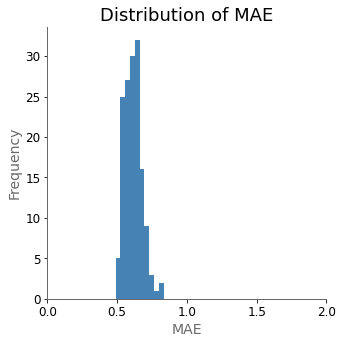

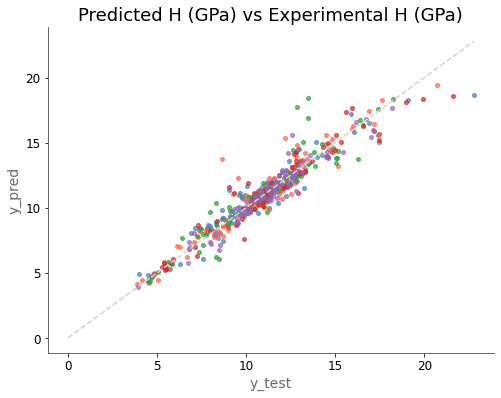

In [32]:
MR.plot_result( 'MAE', 'H (GPa)' , MAE_list, Y_pred, Y_test, 0,2, 1,5, './run/MR/Averaged_H_MAE.png', './run/MR/Averaged_H.png')

### For Confidence Index CI
Define X and y data and train the multiple regressions 

In [33]:
X=data[['Zr','Nb','Mo','Ti','Cr','Zr_Nb','Zr_Mo','Zr_Ti','Zr_Cr','Nb_Mo','Nb_Ti','Nb_Cr','Mo_Ti','Mo_Cr','Ti_Cr','Zr2','Nb2','Mo2','Ti2','Cr2','Zr_Nb2','Zr_Mo2','Zr_Ti2','Zr_Cr2','Nb_Mo2','Nb_Ti2','Nb_Cr2','Mo_Ti2','Mo_Cr2','Ti_Cr2']]
y= data['CI']

model,MAE_list,R2_list,Y_pred,Y_test= MR.fit_outputs('CI ~ Zr + Nb + Mo + Ti + Cr + Zr:Nb +Zr:Mo +Zr:Ti +Zr:Cr +Nb:Mo +Nb:Ti +Nb:Cr +Mo:Ti + Mo:Cr + Ti:Cr + Zr:Nb:Zr_Nb +Zr:Mo:Zr_Mo + Zr:Ti:Zr_Ti+ Zr:Cr:Zr_Cr + Nb:Mo:Nb_Mo +Nb:Ti:Nb_Ti +Nb:Cr:Nb_Cr +Mo:Ti:Mo_Ti + Mo:Cr:Mo_Cr + Ti:Cr:Ti_Cr + Zr:Nb:Mo:Ti + Zr:Nb:Mo:Cr + Zr:Nb:Ti:Cr + Zr:Mo:Ti:Cr + Nb:Mo:Ti:Cr + Zr2:Nb:Mo +Zr2:Nb:Ti +Zr2:Nb:Cr +Zr2:Mo:Ti +Zr2:Mo:Cr +Zr2:Ti:Cr + Zr:Nb2:Mo + Zr:Nb2:Ti +Zr:Nb2:Cr + Zr:Nb:Mo2 + Zr:Nb:Ti2 +Zr:Nb:Cr2 + Zr:Mo2:Ti + Zr:Mo2:Cr + Zr:Mo:Ti2 + Zr:Mo:Cr2 + Zr:Ti2:Cr + Zr:Ti:Cr2 + Nb2:Mo:Ti + Nb2:Mo:Cr + Nb2:Ti:Cr + Nb:Mo2:Ti + Nb:Mo2:Cr +  Nb:Mo:Ti2 + Nb:Mo:Cr2 + Nb:Ti2:Cr + Nb:Ti:Cr2 + Mo2:Ti:Cr +Mo:Ti2:Cr + Mo:Ti:Cr2 + Zr:Nb:Zr_Nb2 +Zr:Mo:Zr_Mo2 + Zr:Ti:Zr_Ti2+ Zr:Cr:Zr_Cr2 + Nb:Mo:Nb_Mo2 +Nb:Ti:Nb_Ti2 +Nb:Cr:Nb_Cr2 +Mo:Ti:Mo_Ti2 + Mo:Cr:Mo_Cr2 + Ti:Cr:Ti_Cr2 -1',5,30,'CI',X,y)

print('R2=',np.mean(R2_list),'+/-',np.std(R2_list))
print('MAE=',np.mean(MAE_list),'+/-',np.std(MAE_list))

R2= 0.8447703447965023 +/- 0.06695199900260312
MAE= 0.05484101830212251 +/- 0.007101942057317843


Plot regression between test and predicted outputs, and metric histogram

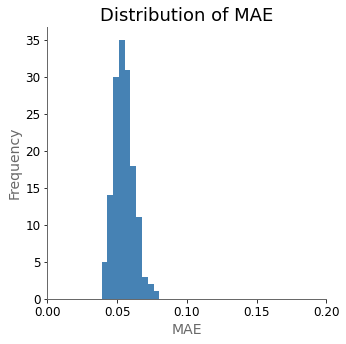

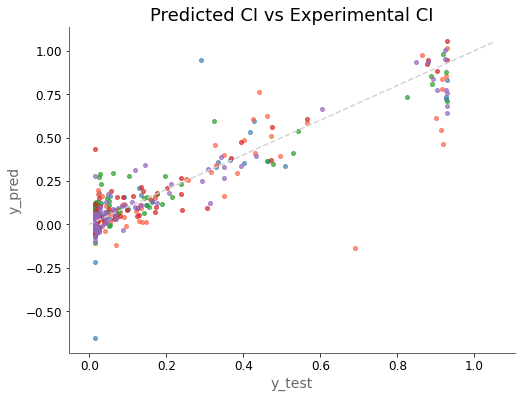

In [34]:
MR.plot_result( 'MAE', 'CI' , MAE_list, Y_pred, Y_test, 0,0.2,1,5, './run/MR/Averaged_CI_MAE.png', './run/MR/Averaged_CI.png')

### For Image Quality (IQ)
Define X and y data and train the multiple regressions 

In [35]:
X=data[['Zr','Nb','Mo','Ti','Cr','Zr_Nb','Zr_Mo','Zr_Ti','Zr_Cr','Nb_Mo','Nb_Ti','Nb_Cr','Mo_Ti','Mo_Cr','Ti_Cr','Zr2','Nb2','Mo2','Ti2','Cr2','Zr_Nb2','Zr_Mo2','Zr_Ti2','Zr_Cr2','Nb_Mo2','Nb_Ti2','Nb_Cr2','Mo_Ti2','Mo_Cr2','Ti_Cr2']]
y= data['IQ']

model,MAE_list, R2_list,Y_pred,Y_test= MR.fit_outputs('IQ ~ Zr + Nb + Mo + Ti + Cr + Zr:Nb +Zr:Mo +Zr:Ti +Zr:Cr +Nb:Mo +Nb:Ti +Nb:Cr +Mo:Ti + Mo:Cr + Ti:Cr + Zr:Nb:Zr_Nb +Zr:Mo:Zr_Mo + Zr:Ti:Zr_Ti+ Zr:Cr:Zr_Cr + Nb:Mo:Nb_Mo +Nb:Ti:Nb_Ti +Nb:Cr:Nb_Cr +Mo:Ti:Mo_Ti + Mo:Cr:Mo_Cr + Ti:Cr:Ti_Cr + Zr:Nb:Mo:Ti + Zr:Nb:Mo:Cr + Zr:Nb:Ti:Cr + Zr:Mo:Ti:Cr + Nb:Mo:Ti:Cr + Zr2:Nb:Mo +Zr2:Nb:Ti +Zr2:Nb:Cr +Zr2:Mo:Ti +Zr2:Mo:Cr +Zr2:Ti:Cr + Zr:Nb2:Mo + Zr:Nb2:Ti +Zr:Nb2:Cr + Zr:Nb:Mo2 + Zr:Nb:Ti2 +Zr:Nb:Cr2 + Zr:Mo2:Ti + Zr:Mo2:Cr + Zr:Mo:Ti2 + Zr:Mo:Cr2 + Zr:Ti2:Cr + Zr:Ti:Cr2 + Nb2:Mo:Ti + Nb2:Mo:Cr + Nb2:Ti:Cr + Nb:Mo2:Ti + Nb:Mo2:Cr +  Nb:Mo:Ti2 + Nb:Mo:Cr2 + Nb:Ti2:Cr + Nb:Ti:Cr2 + Mo2:Ti:Cr +Mo:Ti2:Cr + Mo:Ti:Cr2 + Zr:Nb:Zr_Nb2 +Zr:Mo:Zr_Mo2 + Zr:Ti:Zr_Ti2+ Zr:Cr:Zr_Cr2 + Nb:Mo:Nb_Mo2 +Nb:Ti:Nb_Ti2 +Nb:Cr:Nb_Cr2 +Mo:Ti:Mo_Ti2 + Mo:Cr:Mo_Cr2 + Ti:Cr:Ti_Cr2 -1',5,30,'IQ',X,y)
print('R2=',np.mean(R2_list),'+/-',np.std(R2_list))
print('MAE=',np.mean(MAE_list),'+/-',np.std(MAE_list))

R2= 0.8720970237697664 +/- 0.0513304562466179
MAE= 4769.545101685271 +/- 611.391368274159


Plot regression between test and predicted outputs, and metric histogram

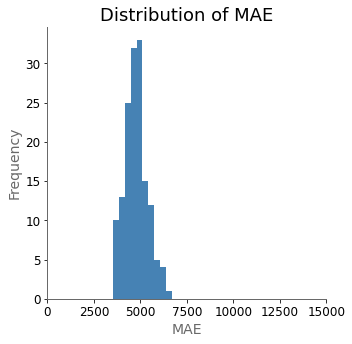

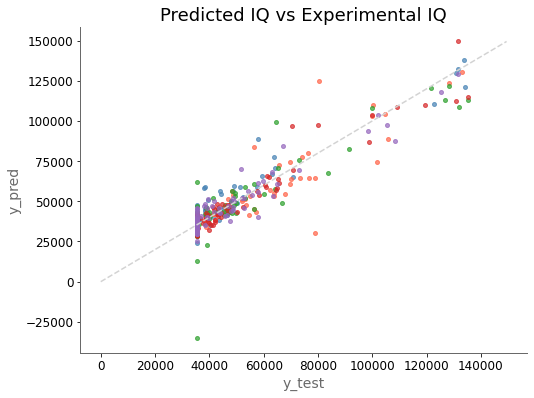

In [36]:
MR.plot_result( 'MAE', 'IQ' , MAE_list, Y_pred, Y_test,0,15000, 1,5, './run/MR/Averaged_IQ_MAE.png', './run/MR/Averaged_IQ.png')

## Regression coefficients plot for each composition or interaction terms

### For elastic modulus E
#### Import database "Compo_E_wo_outlier" and add the intercation columns


In [37]:
data=pd.read_csv(f"{datasets_dir}/Compo_E_wo_outlier.csv", header=0)
data.columns=['compo','sample','Zr', 'Nb','Mo','Ti','Cr','Zr_m','Nb_m','Mo_m','Ti_m','Cr_m','E']
data=MR.Scheffe_interactions_terms(data)

Define X and y data and train the multiple regressions 

In [38]:
X=data[['Zr','Nb','Mo','Ti','Cr','Zr_Nb','Zr_Mo','Zr_Ti','Zr_Cr','Nb_Mo','Nb_Ti','Nb_Cr','Mo_Ti','Mo_Cr','Ti_Cr','Zr2','Nb2','Mo2','Ti2','Cr2','Zr_Nb2','Zr_Mo2','Zr_Ti2','Zr_Cr2','Nb_Mo2','Nb_Ti2','Nb_Cr2','Mo_Ti2','Mo_Cr2','Ti_Cr2']]
y= data['E']

model_expression='E ~ Zr + Nb + Mo + Ti + Cr + Zr:Nb +Zr:Mo +Zr:Ti +Zr:Cr +Nb:Mo +Nb:Ti +Nb:Cr +Mo:Ti + Mo:Cr + Ti:Cr + Zr:Nb:Zr_Nb +Zr:Mo:Zr_Mo + Zr:Ti:Zr_Ti+ Zr:Cr:Zr_Cr + Nb:Mo:Nb_Mo +Nb:Ti:Nb_Ti +Nb:Cr:Nb_Cr +Mo:Ti:Mo_Ti + Mo:Cr:Mo_Cr + Ti:Cr:Ti_Cr + Zr:Nb:Mo:Ti + Zr:Nb:Mo:Cr + Zr:Nb:Ti:Cr + Zr:Mo:Ti:Cr + Nb:Mo:Ti:Cr + Zr2:Nb:Mo +Zr2:Nb:Ti +Zr2:Nb:Cr +Zr2:Mo:Ti +Zr2:Mo:Cr +Zr2:Ti:Cr + Zr:Nb2:Mo + Zr:Nb2:Ti +Zr:Nb2:Cr + Zr:Nb:Mo2 + Zr:Nb:Ti2 +Zr:Nb:Cr2 + Zr:Mo2:Ti + Zr:Mo2:Cr + Zr:Mo:Ti2 + Zr:Mo:Cr2 + Zr:Ti2:Cr + Zr:Ti:Cr2 + Nb2:Mo:Ti + Nb2:Mo:Cr + Nb2:Ti:Cr + Nb:Mo2:Ti + Nb:Mo2:Cr +  Nb:Mo:Ti2 + Nb:Mo:Cr2 + Nb:Ti2:Cr + Nb:Ti:Cr2 + Mo2:Ti:Cr +Mo:Ti2:Cr + Mo:Ti:Cr2 + Zr:Nb:Zr_Nb2 +Zr:Mo:Zr_Mo2 + Zr:Ti:Zr_Ti2+ Zr:Cr:Zr_Cr2 + Nb:Mo:Nb_Mo2 +Nb:Ti:Nb_Ti2 +Nb:Cr:Nb_Cr2 +Mo:Ti:Mo_Ti2 + Mo:Cr:Mo_Cr2 + Ti:Cr:Ti_Cr2 -1'

model,MAE_list, R2_list,Y_pred,Y_test=MR.fit_outputs(model_expression,5,30,'E',X,y)

Coefficients extraction and apply root on coefficient 

In [39]:
display(model.summary())
df_summary = pd.read_html(model.summary().tables[1].as_html(),header=0,index_col=0)[0]

# create a df_corrected too stock corrected coefficients
df_corrected=df_summary.copy()

color=[]
for i in range (0,len(df_summary)):
    #  Define color depending on p-value associated to the coefficient
    if df_summary.iloc[i,3]==0:
        color.append('green')
    elif df_summary.iloc[i,3]<0.05 :
        color.append('blue')
    else :
        color.append('w')   

    # Rules to define the number of element in the regression term: that will give the nth root to apply to the coefficient to be able to compare them
    if df_corrected.index[i].count(':')==1:
        if df_corrected.index[i].count('2')==0:
            if df_corrected.iloc[i,0]<0:
                df_corrected.iloc[i,0]=(-1)*np.abs(df_corrected.iloc[i,0])**(1/2) 
            else:
                df_corrected.iloc[i,0]=df_corrected.iloc[i,0]**(1/2) 
        if df_corrected.index[i].count('2')==1:
            if df_corrected.iloc[i,0]<0:
                df_corrected.iloc[i,0]=(-1)*np.abs(df_corrected.iloc[i,0])**(1/3) 
            else:
                df_corrected.iloc[i,0]=df_corrected.iloc[i,0]**(1/3) 
    if df_corrected.index[i].count(':')==2:
        if df_corrected.index[i].count('2')==0:
            if df_corrected.iloc[i,0]<0:
                df_corrected.iloc[i,0]=(-1)*np.abs(df_corrected.iloc[i,0])**(1/3) 
            else:
                df_corrected.iloc[i,0]=df_corrected.iloc[i,0]**(1/3) 
        if df_corrected.index[i].count('2')==1:
            if df_corrected.iloc[i,0]<0:
                df_corrected.iloc[i,0]=(-1)*np.abs(df_corrected.iloc[i,0])**(1/4) 
            else:
                df_corrected.iloc[i,0]=df_corrected.iloc[i,0]**(1/4) 

    if df_corrected.index[i].count(':')==3:
        if df_corrected.iloc[i,0]<0:
            df_corrected.iloc[i,0]=(-1)*np.abs(df_corrected.iloc[i,0])**(1/4) 
        else:
            df_corrected.iloc[i,0]=df_corrected.iloc[i,0]**(1/4) 


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      E   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              5182.
Date:                Wed, 09 Feb 2022   Prob (F-statistic):                        0.00
Time:                        15:59:20   Log-Likelihood:                         -7050.3
No. Observations:                1761   AIC:                                  1.424e+04
Df Residuals:                    1691   BIC:                                  1.462e+04
Df Model:                          70                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Zr             600.4865     91.112      6.591      0.000     421.782     779.191
Nb             207.7419     33.023      6.291      0.000     142.972     272.511
Mo             384.3281      8.148     47.168      0.000     368.347     400.309
Ti             -39.7171     52.931     -0.750      0.453    -143.535      64.101
Cr             262.7941      8.564     30.687      0.000     245.998     279.590
Zr:Nb         -865.6591    333.700     -2.594      0.010   -1520.168    -211.150
Zr:Mo        -2146.4663    247.115     -8.686      0.000   -2631.150   -1661.782
Zr:Ti        -1021.2453    415.914     -2.455      0.014   -1837.006    -205.485
Zr:Cr        -1511.5800    220.576     -6.853      0.000   -1944.210   -1078.950
Nb:Mo         -248.4299     65.120     -3.815      0.000    -376.154    -120.705
Nb:Ti        -1473.0668    212.834     -6.921      0.000   -1890.513   -1055.621
Nb:Cr         -605.5402    104.466     -5.797      0.000    -810.436    -400.644
Mo:Ti         -174.4277    131.833     -1.323      0.186    -433.001      84.146
Mo:Cr          449.8266     56.509      7.960      0.000     338.992     560.662
Ti:Cr           53.8966    220.534      0.244      0.807    -378.651     486.444
Zr:Nb:Zr_Nb  -1731.7781    928.575     -1.865      0.062   -3553.054      89.498
Zr:Mo:Zr_Mo  -2907.2068   1091.120     -2.664      0.008   -5047.294    -767.120
Zr:Ti:Zr_Ti   -932.6024    973.526     -0.958      0.338   -2842.044     976.839
Zr:Cr:Zr_Cr   -897.1996    694.838     -1.291      0.197   -2260.032     465.633
Nb:Mo:Nb_Mo    119.2528    106.599      1.119      0.263     -89.828     328.333
Nb:Ti:Nb_Ti    306.2646    639.063      0.479      0.632    -947.173    1559.702
Nb:Cr:Nb_Cr   -454.1795    249.936     -1.817      0.069    -944.396      36.037
Mo:Ti:Mo_Ti   -798.9821    559.200     -1.429      0.153   -1895.779     297.815
Mo:Cr:Mo_Cr    383.9333    137.456      2.793      0.005     114.331     653.536
Ti:Cr:Ti_Cr    415.4936    390.361      1.064      0.287    -350.149    1181.136
Zr:Nb:Mo:Ti  -3950.6933   2234.788     -1.768      0.077   -8333.934     432.547
Zr:Nb:Mo:Cr    293.0567   1527.354      0.192      0.848   -2702.647    3288.760
Zr:Nb:Ti:Cr     13.0455   1642.477      0.008      0.994   -3208.456    3234.547
Zr:Mo:Ti:Cr  -6702.1766   1548.830     -4.327      0.000   -9740.002   -3664.351
Nb:Mo:Ti:Cr  -3832.3857   1076.169     -3.561      0.000   -5943.149   -1721.622
Zr2:Nb:Mo     1.058e+04   3325.454      3.182      0.001    4058.034    1.71e+04
Zr2:Nb:Ti     3098.1701   7602.833      0.408      0.684   -1.18e+04     1.8e+04
Zr2:Nb:Cr      1.13e+04   3612.641      3.127      0.002    4209.954    1.84e+04
Zr2:Mo:Ti     1.526e+04   5369.689      2.841      0.005    4723.811

Plot coefficients 

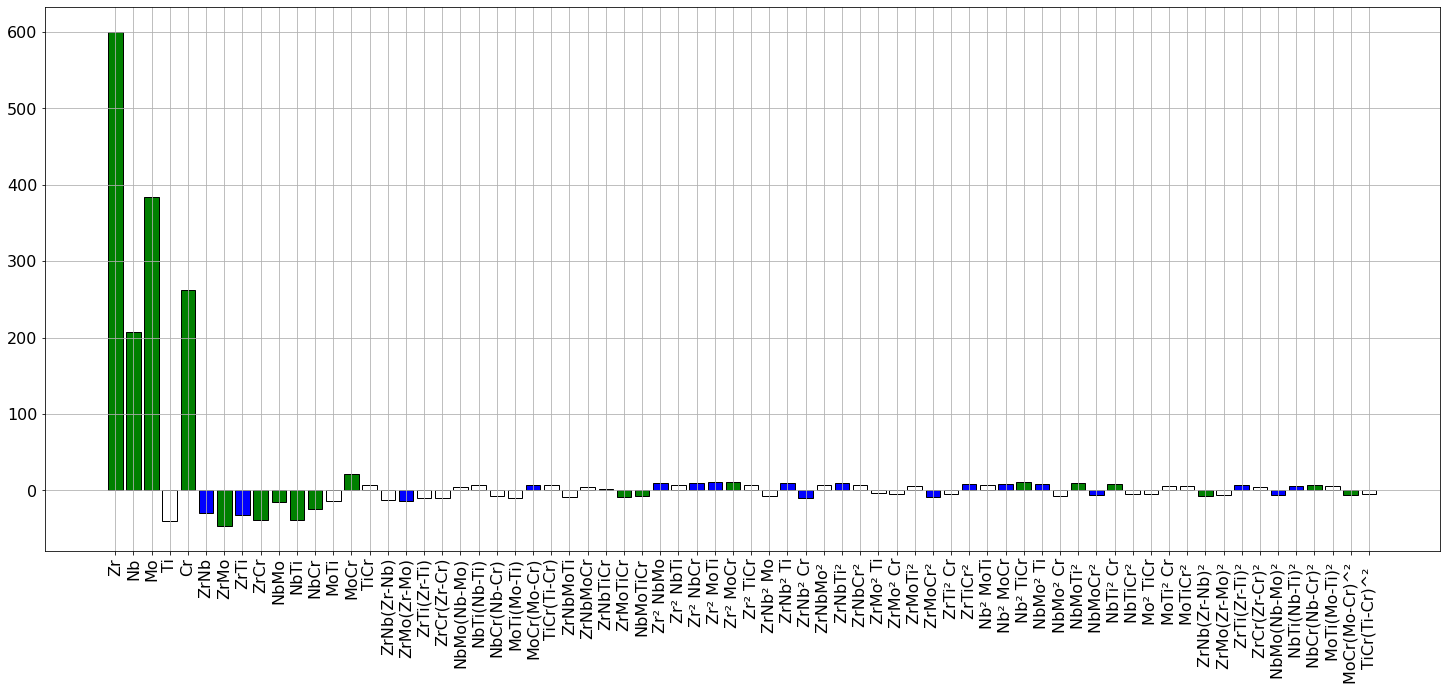

In [40]:
fig=plt.figure(figsize=(25,10))
plt.rcParams.update({'font.size': 16})
ax = fig.add_subplot(111)
x_pos=np.linspace(1,len(df_corrected),len(df_corrected))
ind=pd.read_csv('index_regr_multi.csv')
ind=ind['indice'].to_list()
plt.xticks(x_pos, ind)
plt.bar(x_pos,df_corrected['coef'].values, color=color,edgecolor='black')
ax.set_xticklabels(ind, rotation = 90)
plt.grid()
plt.savefig('./run/MR/interactions_E.png', dpi=300, bbox_inches='tight')
plt.show()
#df.to_csv('coeff_regre_multi.csv')
#df_corrected.to_csv('coeff_regre_multi_corr.csv')

### For hardness H
#### Import database "Compo_H_wo_outlier" and add the intercation columns

In [41]:
data=pd.read_csv(f"{datasets_dir}/Compo_H_wo_outlier.csv", header=0)
data.columns=['compo','sample','Zr', 'Nb','Mo','Ti','Cr','Zr_m','Nb_m','Mo_m','Ti_m','Cr_m','H']
data=MR.Scheffe_interactions_terms(data)

Define X and y data and train the multiple regressions 

In [42]:
X=data[['Zr','Nb','Mo','Ti','Cr','Zr_Nb','Zr_Mo','Zr_Ti','Zr_Cr','Nb_Mo','Nb_Ti','Nb_Cr','Mo_Ti','Mo_Cr','Ti_Cr','Zr2','Nb2','Mo2','Ti2','Cr2','Zr_Nb2','Zr_Mo2','Zr_Ti2','Zr_Cr2','Nb_Mo2','Nb_Ti2','Nb_Cr2','Mo_Ti2','Mo_Cr2','Ti_Cr2']]
y= data['H']

model_expression='H ~ Zr + Nb + Mo + Ti + Cr + Zr:Nb +Zr:Mo +Zr:Ti +Zr:Cr +Nb:Mo +Nb:Ti +Nb:Cr +Mo:Ti + Mo:Cr + Ti:Cr + Zr:Nb:Zr_Nb +Zr:Mo:Zr_Mo + Zr:Ti:Zr_Ti+ Zr:Cr:Zr_Cr + Nb:Mo:Nb_Mo +Nb:Ti:Nb_Ti +Nb:Cr:Nb_Cr +Mo:Ti:Mo_Ti + Mo:Cr:Mo_Cr + Ti:Cr:Ti_Cr + Zr:Nb:Mo:Ti + Zr:Nb:Mo:Cr + Zr:Nb:Ti:Cr + Zr:Mo:Ti:Cr + Nb:Mo:Ti:Cr + Zr2:Nb:Mo +Zr2:Nb:Ti +Zr2:Nb:Cr +Zr2:Mo:Ti +Zr2:Mo:Cr +Zr2:Ti:Cr + Zr:Nb2:Mo + Zr:Nb2:Ti +Zr:Nb2:Cr + Zr:Nb:Mo2 + Zr:Nb:Ti2 +Zr:Nb:Cr2 + Zr:Mo2:Ti + Zr:Mo2:Cr + Zr:Mo:Ti2 + Zr:Mo:Cr2 + Zr:Ti2:Cr + Zr:Ti:Cr2 + Nb2:Mo:Ti + Nb2:Mo:Cr + Nb2:Ti:Cr + Nb:Mo2:Ti + Nb:Mo2:Cr +  Nb:Mo:Ti2 + Nb:Mo:Cr2 + Nb:Ti2:Cr + Nb:Ti:Cr2 + Mo2:Ti:Cr +Mo:Ti2:Cr + Mo:Ti:Cr2 + Zr:Nb:Zr_Nb2 +Zr:Mo:Zr_Mo2 + Zr:Ti:Zr_Ti2+ Zr:Cr:Zr_Cr2 + Nb:Mo:Nb_Mo2 +Nb:Ti:Nb_Ti2 +Nb:Cr:Nb_Cr2 +Mo:Ti:Mo_Ti2 + Mo:Cr:Mo_Cr2 + Ti:Cr:Ti_Cr2 -1'

model,MAE_list, R2_list,Y_pred,Y_test=MR.fit_outputs(model_expression,5,30,'H',X,y)

Coefficients extraction and apply root on coefficient 

In [43]:
display(model.summary())
df_summary = pd.read_html(model.summary().tables[1].as_html(),header=0,index_col=0)[0]

# create a df_corrected too stock corrected coefficients
df_corrected=df_summary.copy()

color=[]
for i in range (0,len(df_summary)):
    #  Define color depending on p-value associated to the coefficient
    if df_summary.iloc[i,3]==0:
        color.append('green')
    elif df_summary.iloc[i,3]<0.05 :
        color.append('blue')
    else :
        color.append('w')    

    # Rules to define the number of element in the regression term: that will give the nth root to apply to the coefficient to be able to compare them
    if df_corrected.index[i].count(':')==1:
        if df_corrected.index[i].count('2')==0:
            if df_corrected.iloc[i,0]<0:
                df_corrected.iloc[i,0]=(-1)*np.abs(df_corrected.iloc[i,0])**(1/2) 
            else:
                df_corrected.iloc[i,0]=df_corrected.iloc[i,0]**(1/2) 
        if df_corrected.index[i].count('2')==1:
            if df_corrected.iloc[i,0]<0:
                df_corrected.iloc[i,0]=(-1)*np.abs(df_corrected.iloc[i,0])**(1/3) 
            else:
                df_corrected.iloc[i,0]=df_corrected.iloc[i,0]**(1/3) 
    if df_corrected.index[i].count(':')==2:
        if df_corrected.index[i].count('2')==0:
            if df_corrected.iloc[i,0]<0:
                df_corrected.iloc[i,0]=(-1)*np.abs(df_corrected.iloc[i,0])**(1/3) 
            else:
                df_corrected.iloc[i,0]=df_corrected.iloc[i,0]**(1/3) 
        if df_corrected.index[i].count('2')==1:
            if df_corrected.iloc[i,0]<0:
                df_corrected.iloc[i,0]=(-1)*np.abs(df_corrected.iloc[i,0])**(1/4) 
            else:
                df_corrected.iloc[i,0]=df_corrected.iloc[i,0]**(1/4) 

    if df_corrected.index[i].count(':')==3:
        if df_corrected.iloc[i,0]<0:
            df_corrected.iloc[i,0]=(-1)*np.abs(df_corrected.iloc[i,0])**(1/4) 
        else:
            df_corrected.iloc[i,0]=df_corrected.iloc[i,0]**(1/4) 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      H   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              4535.
Date:                Wed, 09 Feb 2022   Prob (F-statistic):                        0.00
Time:                        15:59:52   Log-Likelihood:                         -2145.6
No. Observations:                1741   AIC:                                      4431.
Df Residuals:                    1671   BIC:                                      4814.
Df Model:                          70                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Zr              16.0218      5.796      2.764      0.006       4.653      27.390
Nb               9.8120      2.066      4.750      0.000       5.760      13.864
Mo               8.3431      0.540     15.463      0.000       7.285       9.401
Ti              -9.0443      3.326     -2.719      0.007     -15.567      -2.521
Cr               7.6699      0.516     14.852      0.000       6.657       8.683
Zr:Nb          -19.5373     21.611     -0.904      0.366     -61.924      22.849
Zr:Mo          -47.7292     15.541     -3.071      0.002     -78.210     -17.248
Zr:Ti          213.3423     25.575      8.342      0.000     163.180     263.505
Zr:Cr           75.4824     13.753      5.489      0.000      48.508     102.456
Nb:Mo           21.3790      4.070      5.253      0.000      13.397      29.361
Nb:Ti           14.7335     13.085      1.126      0.260     -10.932      40.399
Nb:Cr           76.6216      6.718     11.405      0.000      63.444      89.799
Mo:Ti           53.0031      8.335      6.359      0.000      36.654      69.352
Mo:Cr           12.3066      3.561      3.456      0.001       5.323      19.291
Ti:Cr          133.8219     13.567      9.864      0.000     107.212     160.432
Zr:Nb:Zr_Nb   -211.5977     58.823     -3.597      0.000    -326.972     -96.224
Zr:Mo:Zr_Mo   -409.0412     69.115     -5.918      0.000    -544.602    -273.480
Zr:Ti:Zr_Ti    413.2505     60.177      6.867      0.000     295.220     531.281
Zr:Cr:Zr_Cr    316.8788     43.113      7.350      0.000     232.318     401.440
Nb:Mo:Nb_Mo    -52.9918      6.585     -8.047      0.000     -65.908     -40.075
Nb:Ti:Nb_Ti    212.0403     39.808      5.327      0.000     133.962     290.119
Nb:Cr:Nb_Cr    126.3650     15.619      8.090      0.000      95.730     157.000
Mo:Ti:Mo_Ti   -265.9713     35.597     -7.472      0.000    -335.790    -196.153
Mo:Cr:Mo_Cr   -102.3844      8.710    -11.755      0.000    -119.468     -85.301
Ti:Cr:Ti_Cr     68.8393     24.376      2.824      0.005      21.028     116.651
Zr:Nb:Mo:Ti   -138.2275    138.465     -0.998      0.318    -409.811     133.356
Zr:Nb:Mo:Cr   -360.8769     95.697     -3.771      0.000    -548.576    -173.178
Zr:Nb:Ti:Cr   -222.9535    103.086     -2.163      0.031    -425.145     -20.762
Zr:Mo:Ti:Cr     66.3036     96.575      0.687      0.492    -123.117     255.724
Nb:Mo:Ti:Cr   -673.6676     66.590    -10.117      0.000    -804.277    -543.058
Zr2:Nb:Mo      313.8649    210.005      1.495      0.135     -98.036     725.766
Zr2:Nb:Ti      656.5541    469.040      1.400      0.162    -263.413    1576.521
Zr2:Nb:Cr    -1614.1095    224.025     -7.205      0.000   -2053.508   -1174.711
Zr2:Mo:Ti    -1604.1080    331.129     -4.844      0.000   -2253.580

Plot coefficients 

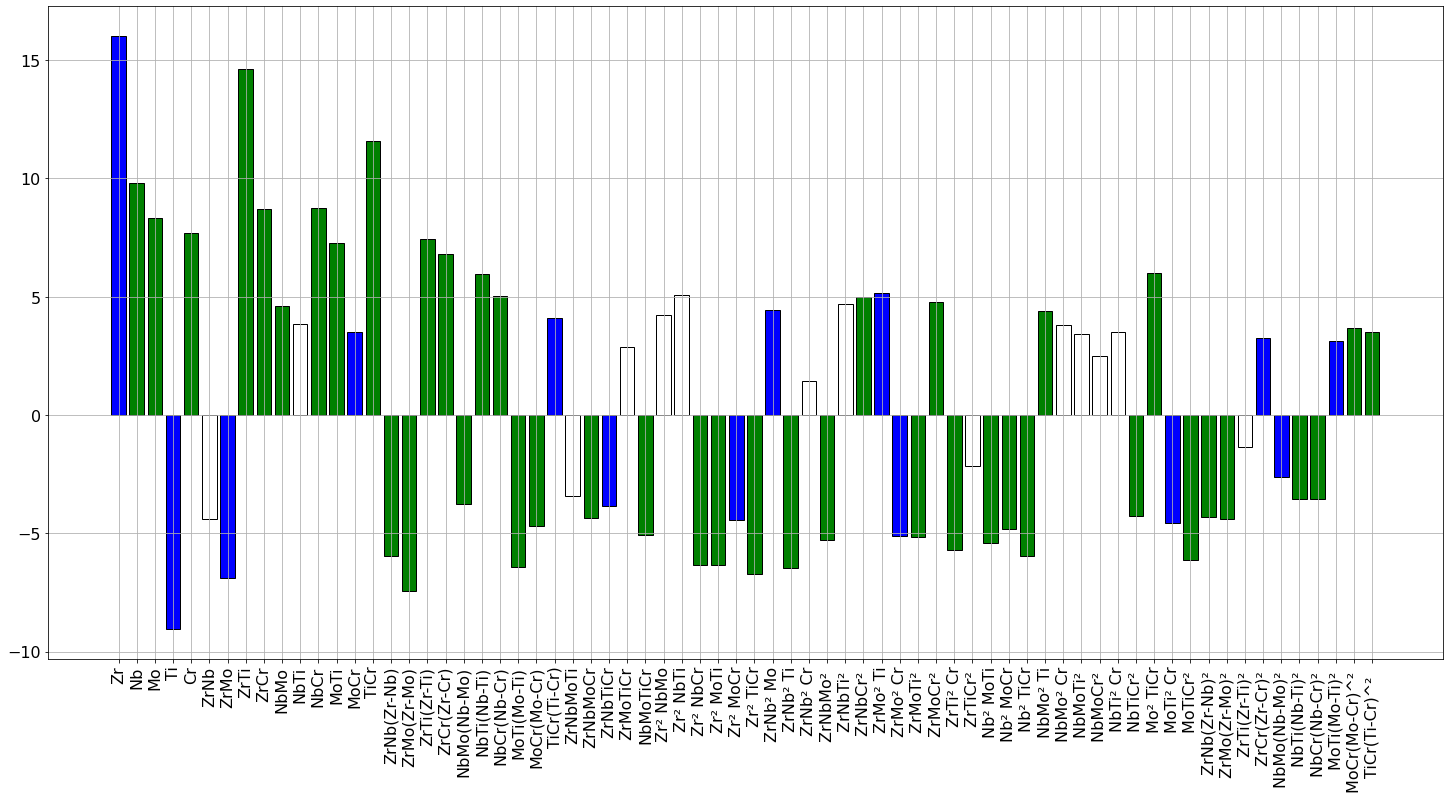

In [44]:
fig=plt.figure(figsize=(25,12))
plt.rcParams.update({'font.size': 16})
ax = fig.add_subplot(111)
x_pos=np.linspace(1,len(df_corrected),len(df_corrected))
ind=pd.read_csv('index_regr_multi.csv')
ind=ind['indice'].to_list()
plt.xticks(x_pos, ind)
plt.bar(x_pos,df_corrected['coef'].values, color=color,edgecolor='black')
ax.set_xticklabels(ind, rotation = 90)
plt.grid()
plt.savefig('./run/MR/interactions_H.png', dpi=300, bbox_inches='tight')
plt.show()

#df.to_csv('coeff_regre_multi.csv')
#df_corrected.to_csv('coeff_regre_multi_corr.csv')